# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

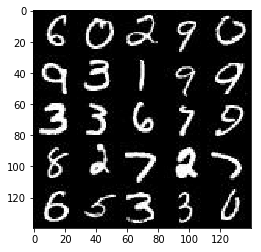

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

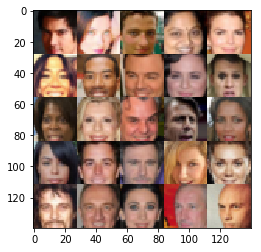

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    with tf.variable_scope("discriminator", reuse=reuse):
        conv1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        lrelu1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x32
        
        conv2 = tf.layers.conv2d(lrelu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(conv2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x64
        
        conv3 = tf.layers.conv2d(lrelu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(conv3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x128

        conv4 = tf.layers.conv2d(lrelu3, 256, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(conv4, training=True)
        lrelu4 = tf.maximum(alpha * bn4, bn4)
        # 2x2x256
        
        flat = tf.reshape(lrelu4, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    reuse = False if is_train else True
    with tf.variable_scope("generator", reuse=reuse):
        # First fully connected layer
        fc1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        reshape = tf.reshape(fc1, (-1, 4, 4, 512))
        batch_norm1 = tf.layers.batch_normalization(reshape, training=is_train)
        lrelu1 = tf.maximum(alpha * batch_norm1, batch_norm1)
        # 4x4x512

        deconv1 = tf.layers.conv2d_transpose(lrelu1, 128, 4, strides=1, padding='valid')
        batch_norm2 = tf.layers.batch_normalization(deconv1, training=is_train)
        lrelu2 = tf.maximum(alpha * batch_norm2, batch_norm2)
        # 7x7x128
        
        deconv2 = tf.layers.conv2d_transpose(lrelu2, 64, 5, 2, 'same')
        batch_norm3 = tf.layers.batch_normalization(deconv2, training=is_train)
        lrelu3 = tf.maximum(alpha * batch_norm3, batch_norm3)
        # 14x14x64
        
        
        deconv3 = tf.layers.conv2d_transpose(lrelu3, 32, 5, 2, 'same')
        batch_norm4 = tf.layers.batch_normalization(deconv3, training=is_train)
        lrelu4 = tf.maximum(alpha * batch_norm4, batch_norm4)
        # 28x28x32
        
        # Logits
        logits = tf.layers.conv2d_transpose(lrelu4, out_channel_dim, 3, 1, 'same')
        # Output
        output = tf.tanh(logits)
        # 28x28xout_dim
        
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Build the model
    g_model = generator(input_z, out_channel_dim)

    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, out_channel_dim = data_shape
    input_ph, z_ph, lr_ph = model_inputs(image_width, image_height, out_channel_dim, z_dim)
    d_loss, g_loss = model_loss(input_ph, z_ph, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr_ph, beta1)
    
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2 
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                sess.run(d_train_opt, feed_dict={input_ph: batch_images, z_ph: batch_z, lr_ph:learning_rate})
                sess.run(g_train_opt, feed_dict={z_ph: batch_z, input_ph: batch_images, lr_ph:learning_rate})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({z_ph: batch_z, input_ph: batch_images})
                    train_loss_g = g_loss.eval({z_ph: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % batch_size == 0:
                    show_generator_output(sess, 25, z_ph, out_channel_dim, data_image_mode)   
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.8292... Generator Loss: 6.3216
Epoch 1/2... Discriminator Loss: 1.4358... Generator Loss: 6.9900
Epoch 1/2... Discriminator Loss: 1.2894... Generator Loss: 2.8927
Epoch 1/2... Discriminator Loss: 1.6464... Generator Loss: 3.2403
Epoch 1/2... Discriminator Loss: 1.0311... Generator Loss: 1.1477
Epoch 1/2... Discriminator Loss: 1.2611... Generator Loss: 0.9358


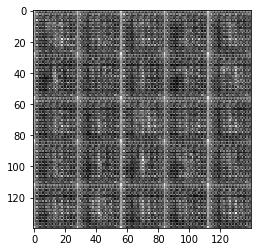

Epoch 1/2... Discriminator Loss: 1.4649... Generator Loss: 0.6121
Epoch 1/2... Discriminator Loss: 1.5364... Generator Loss: 0.4460
Epoch 1/2... Discriminator Loss: 1.3797... Generator Loss: 0.5545
Epoch 1/2... Discriminator Loss: 1.3567... Generator Loss: 0.8613
Epoch 1/2... Discriminator Loss: 1.2888... Generator Loss: 0.6739
Epoch 1/2... Discriminator Loss: 1.6055... Generator Loss: 1.8065


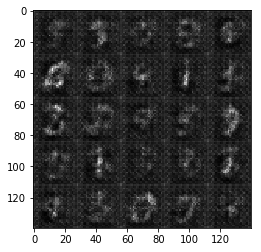

Epoch 1/2... Discriminator Loss: 1.2404... Generator Loss: 0.6841
Epoch 1/2... Discriminator Loss: 1.3864... Generator Loss: 0.5626
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 1.2396
Epoch 1/2... Discriminator Loss: 1.4333... Generator Loss: 0.6901
Epoch 1/2... Discriminator Loss: 1.3083... Generator Loss: 0.7333
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.9504
Epoch 1/2... Discriminator Loss: 1.2606... Generator Loss: 0.7887


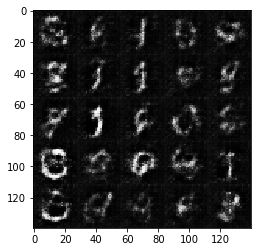

Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.6534
Epoch 1/2... Discriminator Loss: 1.5671... Generator Loss: 0.3988
Epoch 1/2... Discriminator Loss: 1.4209... Generator Loss: 0.6007
Epoch 1/2... Discriminator Loss: 1.2273... Generator Loss: 0.8781
Epoch 1/2... Discriminator Loss: 1.7461... Generator Loss: 0.3017
Epoch 1/2... Discriminator Loss: 1.5931... Generator Loss: 0.3809


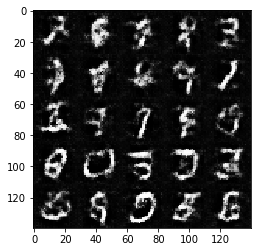

Epoch 1/2... Discriminator Loss: 1.3649... Generator Loss: 0.6069
Epoch 1/2... Discriminator Loss: 1.1887... Generator Loss: 0.9302
Epoch 1/2... Discriminator Loss: 1.1389... Generator Loss: 0.8522
Epoch 1/2... Discriminator Loss: 1.4342... Generator Loss: 0.4796
Epoch 1/2... Discriminator Loss: 1.4701... Generator Loss: 0.4426
Epoch 1/2... Discriminator Loss: 1.4745... Generator Loss: 0.4246
Epoch 1/2... Discriminator Loss: 1.4765... Generator Loss: 0.4510


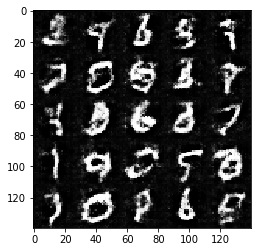

Epoch 1/2... Discriminator Loss: 1.4948... Generator Loss: 0.4485
Epoch 1/2... Discriminator Loss: 1.5874... Generator Loss: 0.5118
Epoch 1/2... Discriminator Loss: 1.3697... Generator Loss: 0.6225
Epoch 1/2... Discriminator Loss: 1.3998... Generator Loss: 0.4936
Epoch 1/2... Discriminator Loss: 1.4682... Generator Loss: 0.4417
Epoch 1/2... Discriminator Loss: 1.7787... Generator Loss: 0.2985


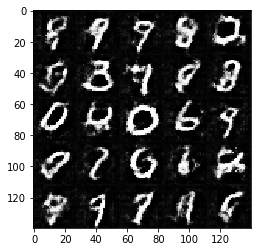

Epoch 1/2... Discriminator Loss: 1.2973... Generator Loss: 0.6330
Epoch 1/2... Discriminator Loss: 1.1925... Generator Loss: 1.1114
Epoch 1/2... Discriminator Loss: 1.0779... Generator Loss: 1.0716
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 0.7211
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 1.5180
Epoch 1/2... Discriminator Loss: 1.1362... Generator Loss: 0.9966


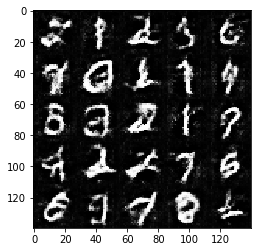

Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 1.5315
Epoch 1/2... Discriminator Loss: 1.3519... Generator Loss: 0.5143
Epoch 1/2... Discriminator Loss: 1.2311... Generator Loss: 0.8219
Epoch 1/2... Discriminator Loss: 1.2037... Generator Loss: 1.2565
Epoch 1/2... Discriminator Loss: 1.0427... Generator Loss: 0.9087
Epoch 1/2... Discriminator Loss: 1.3862... Generator Loss: 0.4687
Epoch 1/2... Discriminator Loss: 1.3297... Generator Loss: 0.5497


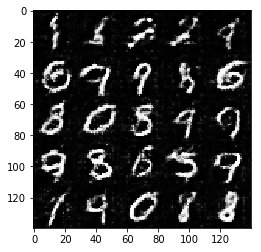

Epoch 1/2... Discriminator Loss: 1.5864... Generator Loss: 0.4242
Epoch 1/2... Discriminator Loss: 1.2937... Generator Loss: 0.9602
Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 0.7399
Epoch 1/2... Discriminator Loss: 1.2801... Generator Loss: 0.6072
Epoch 1/2... Discriminator Loss: 1.1370... Generator Loss: 1.3231
Epoch 1/2... Discriminator Loss: 1.3386... Generator Loss: 1.6707


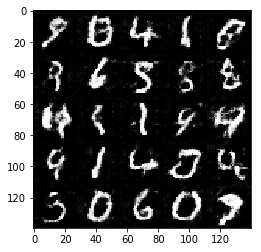

Epoch 1/2... Discriminator Loss: 1.2591... Generator Loss: 0.7553
Epoch 1/2... Discriminator Loss: 1.2533... Generator Loss: 0.8306
Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 1.0974
Epoch 1/2... Discriminator Loss: 1.5039... Generator Loss: 1.1833
Epoch 1/2... Discriminator Loss: 1.2196... Generator Loss: 0.6582
Epoch 1/2... Discriminator Loss: 1.3672... Generator Loss: 0.4975
Epoch 1/2... Discriminator Loss: 1.4263... Generator Loss: 0.4675


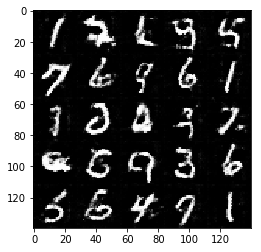

Epoch 1/2... Discriminator Loss: 1.7747... Generator Loss: 0.2921
Epoch 1/2... Discriminator Loss: 1.2095... Generator Loss: 0.7538
Epoch 1/2... Discriminator Loss: 1.3738... Generator Loss: 1.9215
Epoch 1/2... Discriminator Loss: 1.1743... Generator Loss: 0.7475
Epoch 1/2... Discriminator Loss: 1.5563... Generator Loss: 0.4147
Epoch 1/2... Discriminator Loss: 1.2243... Generator Loss: 0.5959


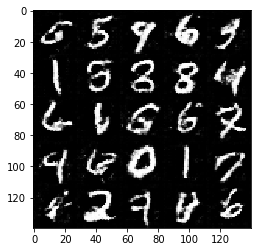

Epoch 1/2... Discriminator Loss: 1.2202... Generator Loss: 0.6573
Epoch 1/2... Discriminator Loss: 1.1919... Generator Loss: 0.6353
Epoch 1/2... Discriminator Loss: 1.2517... Generator Loss: 0.5860
Epoch 1/2... Discriminator Loss: 1.0222... Generator Loss: 1.0193
Epoch 1/2... Discriminator Loss: 1.1248... Generator Loss: 1.1080
Epoch 1/2... Discriminator Loss: 1.0036... Generator Loss: 1.0821


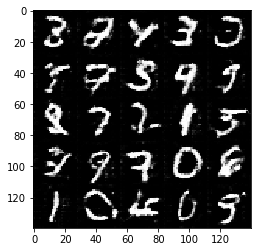

Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 0.9276
Epoch 1/2... Discriminator Loss: 1.0180... Generator Loss: 1.0979
Epoch 1/2... Discriminator Loss: 1.2095... Generator Loss: 0.6812
Epoch 1/2... Discriminator Loss: 1.0942... Generator Loss: 1.3423
Epoch 1/2... Discriminator Loss: 1.0701... Generator Loss: 0.9706
Epoch 1/2... Discriminator Loss: 0.9612... Generator Loss: 1.5030
Epoch 1/2... Discriminator Loss: 1.0140... Generator Loss: 1.3199


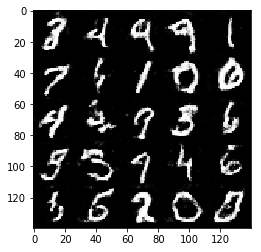

Epoch 1/2... Discriminator Loss: 1.6413... Generator Loss: 0.3731
Epoch 1/2... Discriminator Loss: 1.1211... Generator Loss: 0.8028
Epoch 1/2... Discriminator Loss: 0.9733... Generator Loss: 1.2761
Epoch 1/2... Discriminator Loss: 1.3026... Generator Loss: 0.8646
Epoch 1/2... Discriminator Loss: 1.1380... Generator Loss: 0.7619
Epoch 1/2... Discriminator Loss: 1.3131... Generator Loss: 0.5463


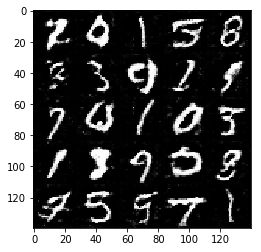

Epoch 1/2... Discriminator Loss: 1.0594... Generator Loss: 0.9095
Epoch 1/2... Discriminator Loss: 1.6002... Generator Loss: 0.3673
Epoch 1/2... Discriminator Loss: 1.7327... Generator Loss: 0.3229
Epoch 1/2... Discriminator Loss: 1.2584... Generator Loss: 0.5673
Epoch 2/2... Discriminator Loss: 1.5318... Generator Loss: 0.3994
Epoch 2/2... Discriminator Loss: 0.9995... Generator Loss: 1.2620
Epoch 2/2... Discriminator Loss: 1.4287... Generator Loss: 1.9699


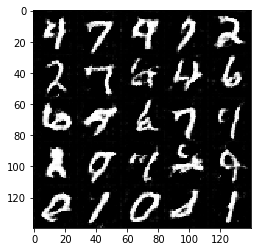

Epoch 2/2... Discriminator Loss: 1.2185... Generator Loss: 0.6271
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.7775
Epoch 2/2... Discriminator Loss: 1.0416... Generator Loss: 0.9160
Epoch 2/2... Discriminator Loss: 1.0498... Generator Loss: 1.0308
Epoch 2/2... Discriminator Loss: 1.2415... Generator Loss: 1.5213
Epoch 2/2... Discriminator Loss: 1.0777... Generator Loss: 1.2698


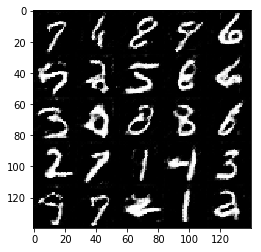

Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 0.9361
Epoch 2/2... Discriminator Loss: 2.4196... Generator Loss: 2.8578
Epoch 2/2... Discriminator Loss: 1.1928... Generator Loss: 0.7101
Epoch 2/2... Discriminator Loss: 1.0003... Generator Loss: 0.9396
Epoch 2/2... Discriminator Loss: 0.9197... Generator Loss: 1.2979
Epoch 2/2... Discriminator Loss: 1.0687... Generator Loss: 1.3604


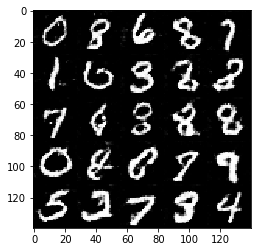

Epoch 2/2... Discriminator Loss: 0.9571... Generator Loss: 0.9143
Epoch 2/2... Discriminator Loss: 1.4086... Generator Loss: 1.7892
Epoch 2/2... Discriminator Loss: 1.0241... Generator Loss: 1.2278
Epoch 2/2... Discriminator Loss: 1.6253... Generator Loss: 2.2121
Epoch 2/2... Discriminator Loss: 1.0432... Generator Loss: 0.8451
Epoch 2/2... Discriminator Loss: 0.9753... Generator Loss: 1.3209
Epoch 2/2... Discriminator Loss: 0.9755... Generator Loss: 1.1854


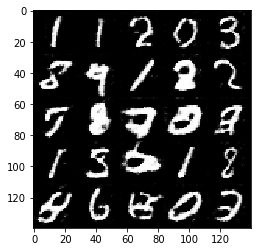

Epoch 2/2... Discriminator Loss: 1.3436... Generator Loss: 1.8852
Epoch 2/2... Discriminator Loss: 1.0597... Generator Loss: 0.9051
Epoch 2/2... Discriminator Loss: 0.8939... Generator Loss: 1.3910
Epoch 2/2... Discriminator Loss: 1.0352... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 1.8211... Generator Loss: 0.2778
Epoch 2/2... Discriminator Loss: 1.0057... Generator Loss: 0.8980


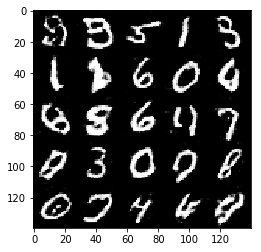

Epoch 2/2... Discriminator Loss: 1.2285... Generator Loss: 1.4426
Epoch 2/2... Discriminator Loss: 1.1274... Generator Loss: 0.7335
Epoch 2/2... Discriminator Loss: 1.0522... Generator Loss: 0.8673
Epoch 2/2... Discriminator Loss: 0.9887... Generator Loss: 0.9407
Epoch 2/2... Discriminator Loss: 1.3515... Generator Loss: 1.2881
Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 1.1259
Epoch 2/2... Discriminator Loss: 1.3764... Generator Loss: 0.5263


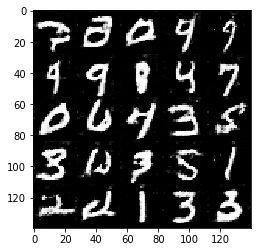

Epoch 2/2... Discriminator Loss: 1.1300... Generator Loss: 0.9234
Epoch 2/2... Discriminator Loss: 0.9211... Generator Loss: 1.7303
Epoch 2/2... Discriminator Loss: 1.0676... Generator Loss: 1.2071
Epoch 2/2... Discriminator Loss: 1.0657... Generator Loss: 1.3493
Epoch 2/2... Discriminator Loss: 1.0427... Generator Loss: 1.5260
Epoch 2/2... Discriminator Loss: 1.1535... Generator Loss: 0.6540


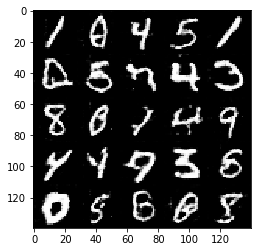

Epoch 2/2... Discriminator Loss: 1.3774... Generator Loss: 0.5141
Epoch 2/2... Discriminator Loss: 1.1224... Generator Loss: 1.1069
Epoch 2/2... Discriminator Loss: 0.8651... Generator Loss: 1.3103
Epoch 2/2... Discriminator Loss: 1.1803... Generator Loss: 1.5630
Epoch 2/2... Discriminator Loss: 1.1427... Generator Loss: 0.9939
Epoch 2/2... Discriminator Loss: 1.1335... Generator Loss: 1.7119


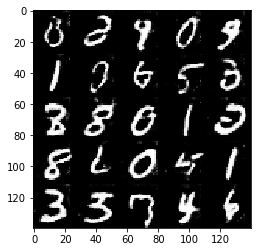

Epoch 2/2... Discriminator Loss: 1.0142... Generator Loss: 0.9178
Epoch 2/2... Discriminator Loss: 1.6538... Generator Loss: 0.4058
Epoch 2/2... Discriminator Loss: 1.3158... Generator Loss: 0.5580
Epoch 2/2... Discriminator Loss: 0.9134... Generator Loss: 1.0640
Epoch 2/2... Discriminator Loss: 1.8548... Generator Loss: 2.5099
Epoch 2/2... Discriminator Loss: 1.3994... Generator Loss: 0.4891
Epoch 2/2... Discriminator Loss: 1.0178... Generator Loss: 0.9796


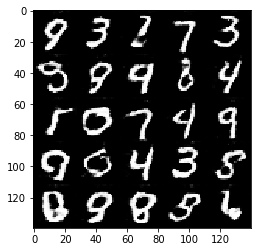

Epoch 2/2... Discriminator Loss: 0.9894... Generator Loss: 0.9573
Epoch 2/2... Discriminator Loss: 1.0928... Generator Loss: 0.9369
Epoch 2/2... Discriminator Loss: 1.6487... Generator Loss: 0.3481
Epoch 2/2... Discriminator Loss: 1.1872... Generator Loss: 0.6545
Epoch 2/2... Discriminator Loss: 0.9450... Generator Loss: 1.2396
Epoch 2/2... Discriminator Loss: 1.1320... Generator Loss: 1.6709


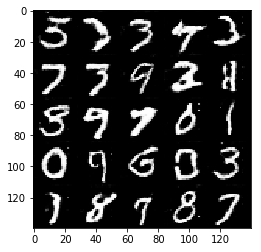

Epoch 2/2... Discriminator Loss: 1.0965... Generator Loss: 0.7142
Epoch 2/2... Discriminator Loss: 1.4239... Generator Loss: 0.4566
Epoch 2/2... Discriminator Loss: 1.9977... Generator Loss: 2.7159
Epoch 2/2... Discriminator Loss: 1.1584... Generator Loss: 0.6935
Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 0.8551
Epoch 2/2... Discriminator Loss: 1.2585... Generator Loss: 1.2958
Epoch 2/2... Discriminator Loss: 0.8529... Generator Loss: 1.1944


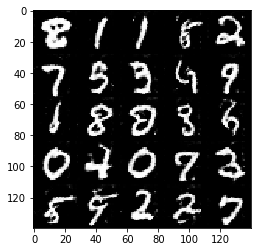

Epoch 2/2... Discriminator Loss: 1.4314... Generator Loss: 2.0692
Epoch 2/2... Discriminator Loss: 1.2300... Generator Loss: 0.5886
Epoch 2/2... Discriminator Loss: 1.8770... Generator Loss: 0.3114
Epoch 2/2... Discriminator Loss: 0.8102... Generator Loss: 1.2725
Epoch 2/2... Discriminator Loss: 0.9978... Generator Loss: 0.9499
Epoch 2/2... Discriminator Loss: 1.2469... Generator Loss: 0.6023


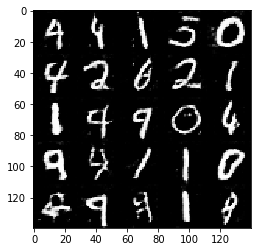

Epoch 2/2... Discriminator Loss: 1.4978... Generator Loss: 0.4220
Epoch 2/2... Discriminator Loss: 0.7598... Generator Loss: 1.4502
Epoch 2/2... Discriminator Loss: 2.3889... Generator Loss: 3.1806
Epoch 2/2... Discriminator Loss: 1.0552... Generator Loss: 0.7659
Epoch 2/2... Discriminator Loss: 0.8013... Generator Loss: 1.1477
Epoch 2/2... Discriminator Loss: 1.0130... Generator Loss: 0.8403


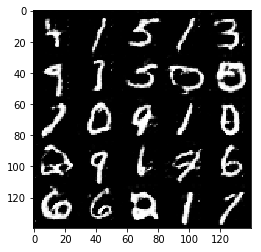

Epoch 2/2... Discriminator Loss: 0.8537... Generator Loss: 1.6848
Epoch 2/2... Discriminator Loss: 0.8873... Generator Loss: 0.9798
Epoch 2/2... Discriminator Loss: 0.9918... Generator Loss: 1.1321
Epoch 2/2... Discriminator Loss: 0.8110... Generator Loss: 1.7358
Epoch 2/2... Discriminator Loss: 0.9364... Generator Loss: 0.9700
Epoch 2/2... Discriminator Loss: 1.8324... Generator Loss: 0.3048
Epoch 2/2... Discriminator Loss: 1.1385... Generator Loss: 0.6502


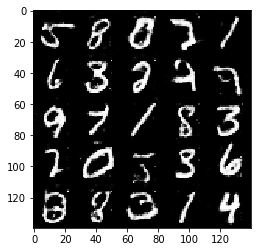

Epoch 2/2... Discriminator Loss: 1.4511... Generator Loss: 0.4502
Epoch 2/2... Discriminator Loss: 1.5737... Generator Loss: 0.3904
Epoch 2/2... Discriminator Loss: 1.3134... Generator Loss: 0.5698
Epoch 2/2... Discriminator Loss: 1.4270... Generator Loss: 0.4633
Epoch 2/2... Discriminator Loss: 0.8147... Generator Loss: 1.7625
Epoch 2/2... Discriminator Loss: 1.2536... Generator Loss: 0.5745


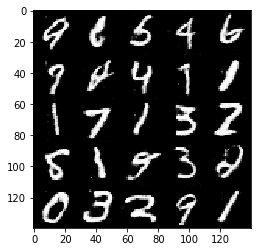

Epoch 2/2... Discriminator Loss: 1.6741... Generator Loss: 2.3367
Epoch 2/2... Discriminator Loss: 1.2390... Generator Loss: 0.5801


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.5598... Generator Loss: 4.6129
Epoch 1/1... Discriminator Loss: 0.7859... Generator Loss: 2.4423
Epoch 1/1... Discriminator Loss: 1.8091... Generator Loss: 3.4595
Epoch 1/1... Discriminator Loss: 1.7775... Generator Loss: 0.3487
Epoch 1/1... Discriminator Loss: 1.1265... Generator Loss: 0.7229
Epoch 1/1... Discriminator Loss: 1.4965... Generator Loss: 0.4631


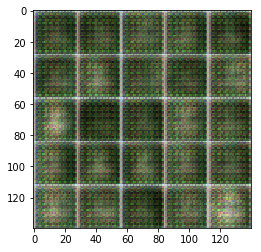

Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 1.7105
Epoch 1/1... Discriminator Loss: 1.7099... Generator Loss: 0.3635
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.5800... Generator Loss: 2.6692
Epoch 1/1... Discriminator Loss: 1.8037... Generator Loss: 2.0837
Epoch 1/1... Discriminator Loss: 1.7510... Generator Loss: 1.8431


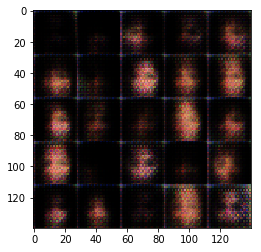

Epoch 1/1... Discriminator Loss: 1.3959... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 1.1349
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 1.3259
Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 1.2894


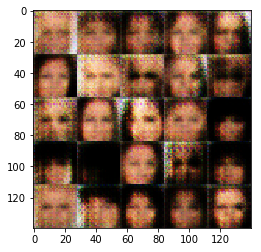

Epoch 1/1... Discriminator Loss: 1.4186... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.3594... Generator Loss: 1.5416
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 1.0017
Epoch 1/1... Discriminator Loss: 1.2265... Generator Loss: 0.9139
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.8072


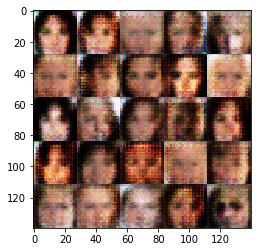

Epoch 1/1... Discriminator Loss: 1.5561... Generator Loss: 0.4169
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 1.4970
Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.5298
Epoch 1/1... Discriminator Loss: 1.5998... Generator Loss: 0.4029
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.3590


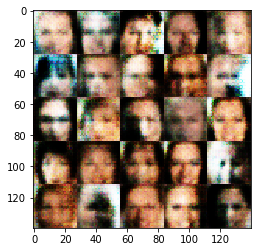

Epoch 1/1... Discriminator Loss: 0.9679... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.6958
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 1.0633


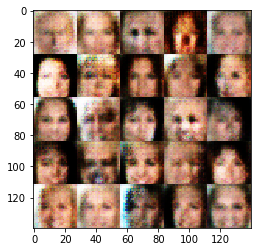

Epoch 1/1... Discriminator Loss: 2.4402... Generator Loss: 2.6141
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.7678
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 1.6077... Generator Loss: 0.3713
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 1.4173


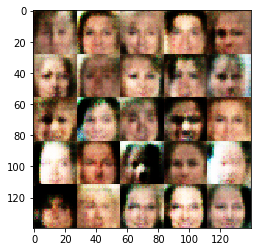

Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 0.7570
Epoch 1/1... Discriminator Loss: 1.1008... Generator Loss: 1.4563
Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 1.4076
Epoch 1/1... Discriminator Loss: 0.9421... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.8389
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.9241
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.8144


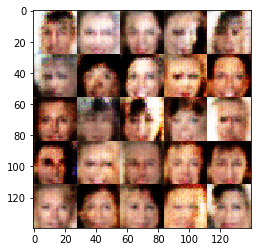

Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.8292
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 1.0057
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 0.9214


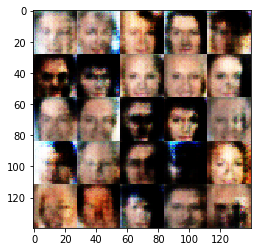

Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.0046... Generator Loss: 0.7982
Epoch 1/1... Discriminator Loss: 1.3994... Generator Loss: 0.4767
Epoch 1/1... Discriminator Loss: 0.9643... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 1.3984... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 1.2747... Generator Loss: 0.8341
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.7886


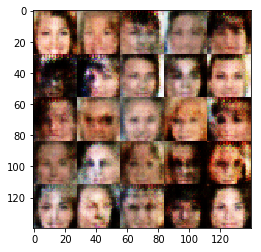

Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.3398... Generator Loss: 0.6682
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.6395
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.5609
Epoch 1/1... Discriminator Loss: 1.8336... Generator Loss: 0.2866
Epoch 1/1... Discriminator Loss: 1.1327... Generator Loss: 1.1935


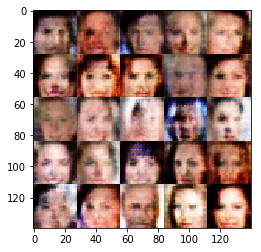

Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 1.2663
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 1.0347
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.5592
Epoch 1/1... Discriminator Loss: 1.2486... Generator Loss: 0.7038
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.7851


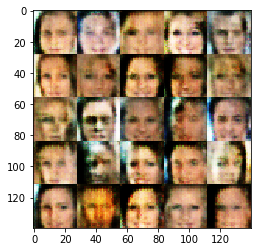

Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.0830... Generator Loss: 0.8602
Epoch 1/1... Discriminator Loss: 1.4254... Generator Loss: 0.9304
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.8219
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.7832
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.7990


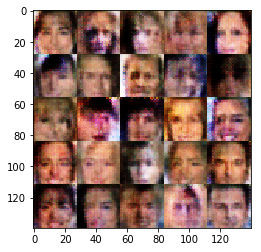

Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.5549
Epoch 1/1... Discriminator Loss: 1.9434... Generator Loss: 0.2445
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.6865


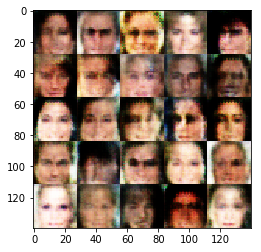

Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.7421
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.6932
Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.8313
Epoch 1/1... Discriminator Loss: 1.1476... Generator Loss: 0.7351


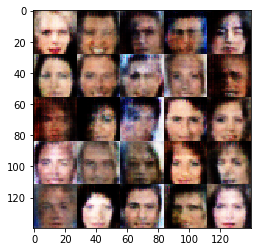

Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 1.3005
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.5511
Epoch 1/1... Discriminator Loss: 1.1939... Generator Loss: 0.8197
Epoch 1/1... Discriminator Loss: 1.1199... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 1.1060
Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.5864


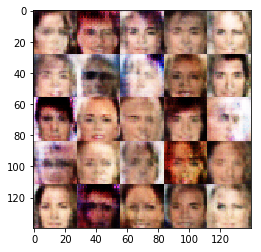

Epoch 1/1... Discriminator Loss: 1.7309... Generator Loss: 2.2952
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 1.2066
Epoch 1/1... Discriminator Loss: 1.5279... Generator Loss: 1.6689
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.6076
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.6848... Generator Loss: 1.9259


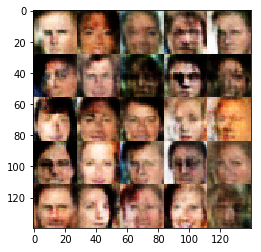

Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 2.0428... Generator Loss: 2.4679
Epoch 1/1... Discriminator Loss: 1.2272... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.6593... Generator Loss: 0.3623
Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.5341
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 1.3836
Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 1.0548


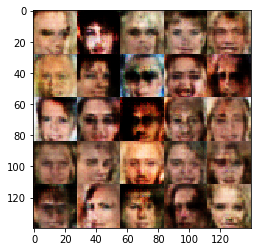

Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.5667
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.5607
Epoch 1/1... Discriminator Loss: 1.5892... Generator Loss: 0.3902
Epoch 1/1... Discriminator Loss: 1.8328... Generator Loss: 2.1347
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 1.0576... Generator Loss: 1.0448


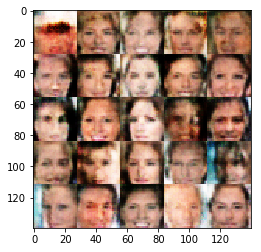

Epoch 1/1... Discriminator Loss: 1.1695... Generator Loss: 1.1359
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.1487
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 1.6541... Generator Loss: 0.3460
Epoch 1/1... Discriminator Loss: 1.4203... Generator Loss: 0.4679
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 0.7644
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.5424


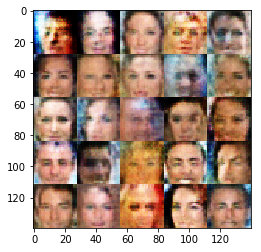

Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 1.0001
Epoch 1/1... Discriminator Loss: 1.6824... Generator Loss: 0.3259
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 1.3783
Epoch 1/1... Discriminator Loss: 1.7260... Generator Loss: 0.3327
Epoch 1/1... Discriminator Loss: 1.5355... Generator Loss: 0.3983
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 0.8114


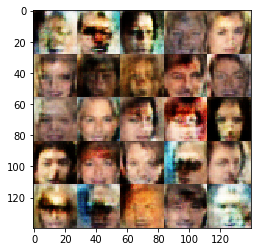

Epoch 1/1... Discriminator Loss: 1.0330... Generator Loss: 1.2493
Epoch 1/1... Discriminator Loss: 1.5773... Generator Loss: 0.4251
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.9100
Epoch 1/1... Discriminator Loss: 1.3163... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.6269... Generator Loss: 0.3629
Epoch 1/1... Discriminator Loss: 1.1341... Generator Loss: 0.8835


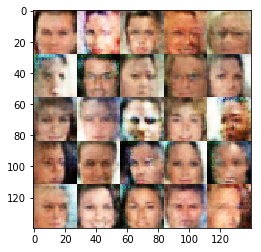

Epoch 1/1... Discriminator Loss: 1.1817... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.7532
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.6905
Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.5219... Generator Loss: 0.4189
Epoch 1/1... Discriminator Loss: 1.6545... Generator Loss: 0.3457
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 0.7568


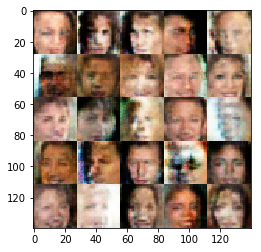

Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 1.4040
Epoch 1/1... Discriminator Loss: 1.2009... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 1.3702
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 1.5646


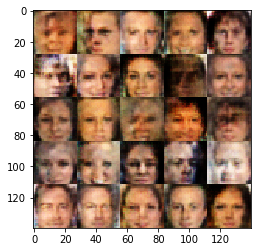

Epoch 1/1... Discriminator Loss: 1.6592... Generator Loss: 0.3485
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.5720
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 1.3975... Generator Loss: 0.4863
Epoch 1/1... Discriminator Loss: 1.4804... Generator Loss: 0.5874
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.4326


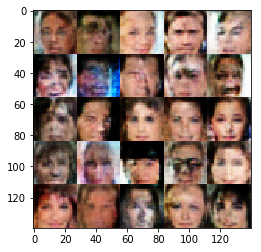

Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.5193
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 1.2739
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.9940
Epoch 1/1... Discriminator Loss: 1.1687... Generator Loss: 0.8317
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.5997... Generator Loss: 0.3836


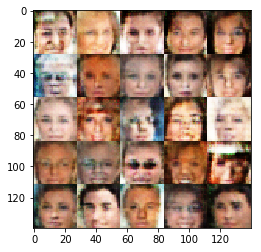

Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 1.2145
Epoch 1/1... Discriminator Loss: 1.2315... Generator Loss: 0.7305
Epoch 1/1... Discriminator Loss: 1.5602... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.5771... Generator Loss: 0.3794
Epoch 1/1... Discriminator Loss: 1.5484... Generator Loss: 0.3828


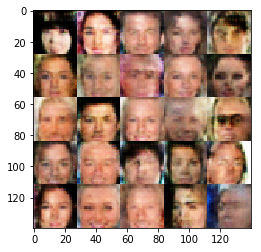

Epoch 1/1... Discriminator Loss: 1.1446... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 1.2063
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 1.1129
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 1.1766
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.6869
Epoch 1/1... Discriminator Loss: 1.2192... Generator Loss: 0.8860
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.5184


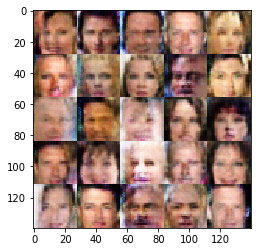

Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.9820
Epoch 1/1... Discriminator Loss: 1.2129... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.7282... Generator Loss: 0.3281
Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 0.4226
Epoch 1/1... Discriminator Loss: 1.2518... Generator Loss: 1.1172


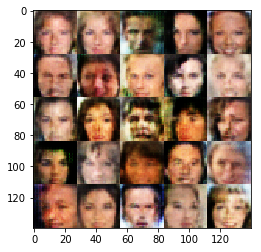

Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 0.9608
Epoch 1/1... Discriminator Loss: 1.8738... Generator Loss: 0.2587
Epoch 1/1... Discriminator Loss: 1.6636... Generator Loss: 0.3547
Epoch 1/1... Discriminator Loss: 1.7512... Generator Loss: 0.3100
Epoch 1/1... Discriminator Loss: 1.7106... Generator Loss: 0.3487
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.7252


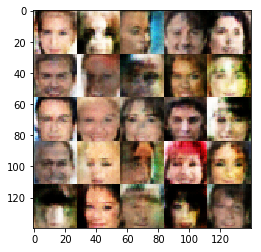

Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.9853
Epoch 1/1... Discriminator Loss: 1.1120... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.1682... Generator Loss: 1.0660
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.6529... Generator Loss: 0.3443


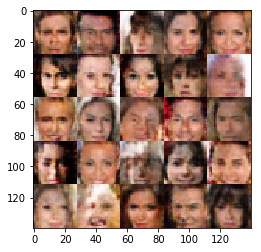

Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.6362
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 1.2487
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 1.3318
Epoch 1/1... Discriminator Loss: 1.4914... Generator Loss: 0.4629
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.5145
Epoch 1/1... Discriminator Loss: 1.4601... Generator Loss: 0.4294


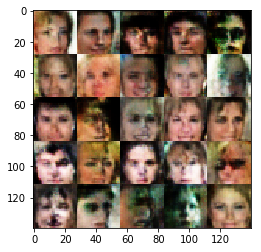

Epoch 1/1... Discriminator Loss: 1.4685... Generator Loss: 1.9433
Epoch 1/1... Discriminator Loss: 1.6319... Generator Loss: 0.3739
Epoch 1/1... Discriminator Loss: 1.4672... Generator Loss: 0.4555
Epoch 1/1... Discriminator Loss: 1.4808... Generator Loss: 0.4235
Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 1.3152
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.8300


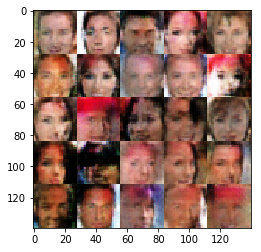

Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 1.3816
Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.6677
Epoch 1/1... Discriminator Loss: 1.4156... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.4074
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 1.6954... Generator Loss: 0.3280


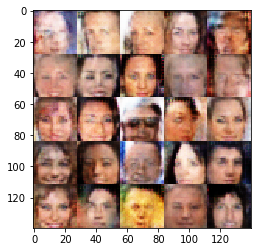

Epoch 1/1... Discriminator Loss: 1.3262... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 1.2418... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 0.9029
Epoch 1/1... Discriminator Loss: 1.0711... Generator Loss: 1.2417
Epoch 1/1... Discriminator Loss: 1.2934... Generator Loss: 0.7536


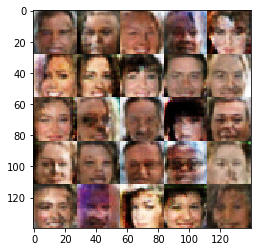

Epoch 1/1... Discriminator Loss: 1.4166... Generator Loss: 1.4583
Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 1.1177
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.5012
Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.6059... Generator Loss: 0.3798


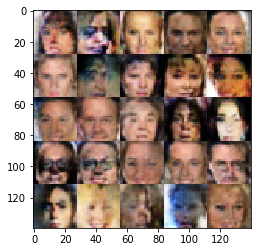

Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.7763
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 0.9068
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.8450
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 1.1304
Epoch 1/1... Discriminator Loss: 0.9653... Generator Loss: 0.9733
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.5559


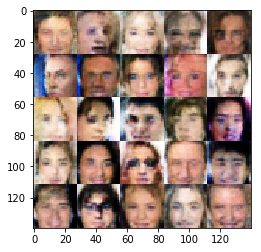

Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 1.4576
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.5023
Epoch 1/1... Discriminator Loss: 1.2747... Generator Loss: 0.6881
Epoch 1/1... Discriminator Loss: 1.9040... Generator Loss: 0.2538
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.1900... Generator Loss: 1.1814
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.8645


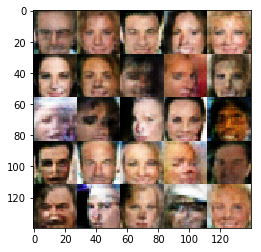

Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.9959
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 1.3858
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.5273
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 1.1642
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.5121
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.4292


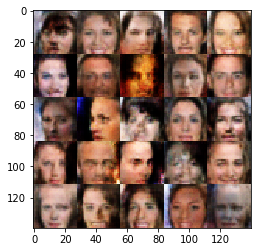

Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 0.3997
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.7657
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.6157... Generator Loss: 0.3751
Epoch 1/1... Discriminator Loss: 1.8567... Generator Loss: 0.2737
Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.6338... Generator Loss: 0.3460


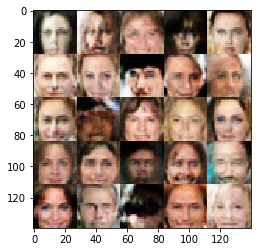

Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.5223... Generator Loss: 0.4222
Epoch 1/1... Discriminator Loss: 1.5967... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 1.1952... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 1.1794
Epoch 1/1... Discriminator Loss: 1.9072... Generator Loss: 0.2590


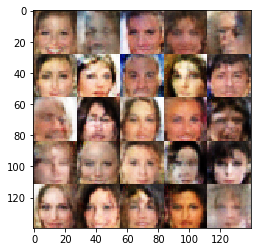

Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.5496
Epoch 1/1... Discriminator Loss: 1.1726... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 1.0772
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.5117
Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 1.0027
Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 0.7520


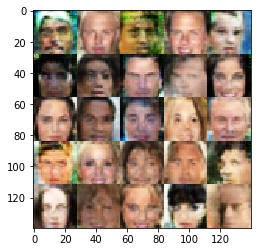

Epoch 1/1... Discriminator Loss: 1.1869... Generator Loss: 1.1100
Epoch 1/1... Discriminator Loss: 1.4497... Generator Loss: 0.4733
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 1.0090
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 1.0355
Epoch 1/1... Discriminator Loss: 1.6145... Generator Loss: 0.3603


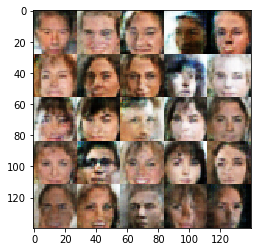

Epoch 1/1... Discriminator Loss: 1.2429... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.1949... Generator Loss: 0.9300
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.5717
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.5047
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.4711
Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 0.5023


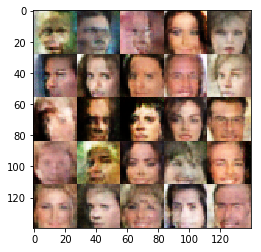

Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 1.1981
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 0.7940
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 2.1973... Generator Loss: 0.1885
Epoch 1/1... Discriminator Loss: 1.6211... Generator Loss: 0.3952


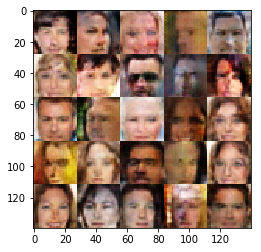

Epoch 1/1... Discriminator Loss: 1.5634... Generator Loss: 0.3997
Epoch 1/1... Discriminator Loss: 1.6661... Generator Loss: 0.3394
Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.5102
Epoch 1/1... Discriminator Loss: 1.6319... Generator Loss: 0.3530
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5448
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.5098


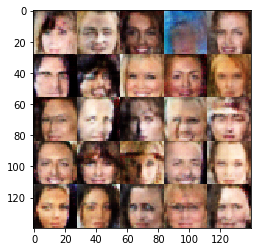

Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.1355
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.5589
Epoch 1/1... Discriminator Loss: 1.2591... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.8244
Epoch 1/1... Discriminator Loss: 1.2540... Generator Loss: 0.9193


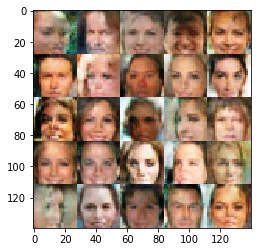

Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.4594
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.9704
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 0.5697
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 1.5439... Generator Loss: 0.4092
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.4820


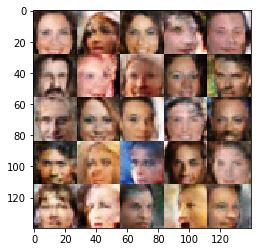

Epoch 1/1... Discriminator Loss: 1.6055... Generator Loss: 0.3546
Epoch 1/1... Discriminator Loss: 1.7303... Generator Loss: 0.3273
Epoch 1/1... Discriminator Loss: 1.6348... Generator Loss: 0.3920
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 0.4512
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 0.9096
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.6609


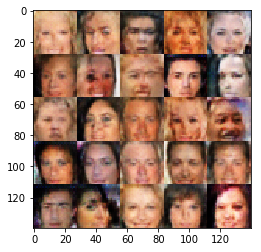

Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 1.1655... Generator Loss: 0.9580
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.8845


In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.